# ch 4. 계층적 군집 분석

## Hierarchical Clustering

계층적 군집은 한 군집 내에 부분 군집을 허용하는 방법입니다. 서로 가까운 데이터 샘플끼리 군집으로 묶어나가면서 최종적으로는 전체 데이터 샘플을 하나의 클러스터로 묶습니다.

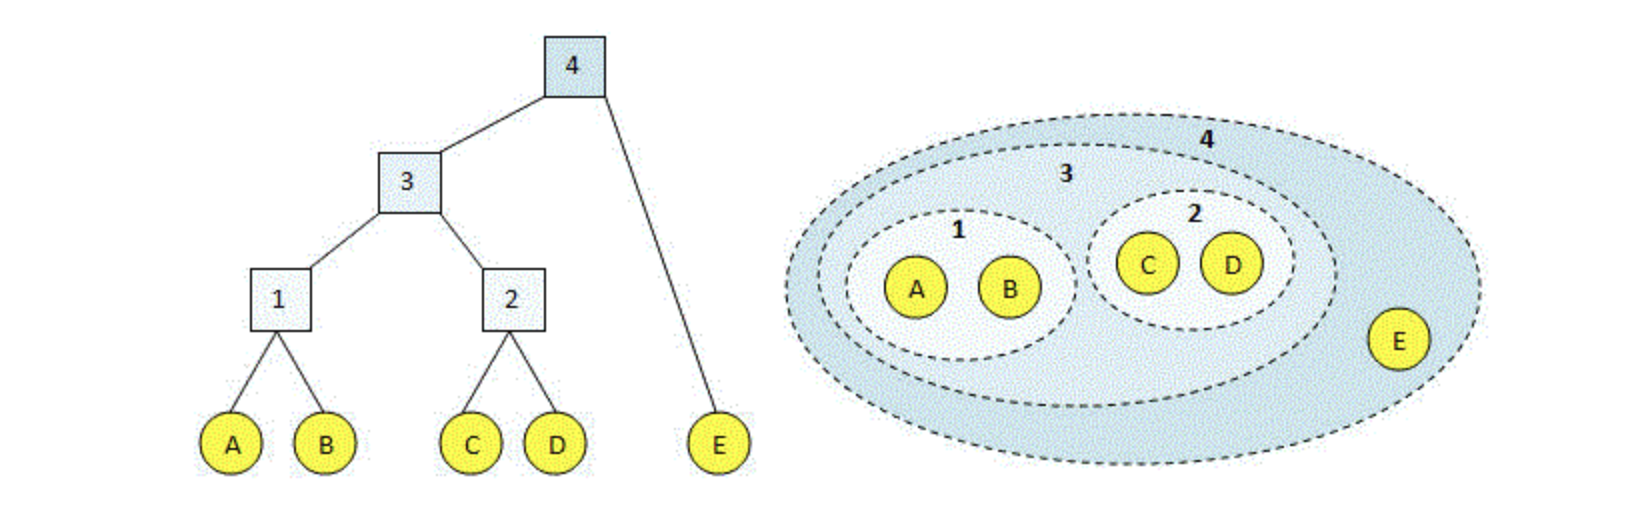

## 계층적 군집 분석의 장단점

### 장점: 해석 가능성

계층적 군집 분석은 댄드로그램으로 시각화하여 군집의 개수를 결정할 수 있다는 장점이 있습니다. 때문에 사전에 클러스터의 개수를 지정할 필요가 없습니다.

그러나 데이터의 샘플 수와 차원이 많아지면 계층 구조를 해석하고 적절한 클러스터 수를 결정하는 것은 주관적이고 어려울 수 있습니다. 

### 단점: 계산 비용

다만, 계층적 군집 분석은 모든 데이터 포인트 간의 거리를 계산해야 합니다. 데이터 포인트의 수가 많을수록 계산 복잡성이 증가하며, 큰 데이터 세트에서는 시간과 메모리 측면에서 비효율적일 수 있습니다.

## 예제) 집 값 데이터 군집분석

집의 특징과 집 값이 매핑되어 있는 데이터 셋을 가지고 계층적 군집 분석을 해보겠습니다.

### 데이터 셋 준비

직접 실습을 통해서 덴드로그램을 이해해보겠습니다. 먼저 집 값 예측 데이터 셋을 불러와서 전처리 하겠습니다.

### 연결 종류
계층적 군집 분석 모델을 생성할 때는 거리를 측정하는 기준을 지정합니다. 선택할 수 있는 연결 종류는 아래와 같습니다.

1. 단일 연결법(single linkage)
    - 주어진 군집의 샘플들끼리 거리를 측정합니다. 계산된 거리중 가장 작은 값을 두 군집의 거리로 간주하여 묶어줍니다.
2. 완전 연결법(complete linkage)
    - 주어진 군집의 샘플들끼리 거리를 측정합니다. 계산된 거리중 가장 큰 값을 두 군집의 거리로 간주합니다. 이렇게 측정된 거리가 가장 작은 두 군집을 묶어줍니다.
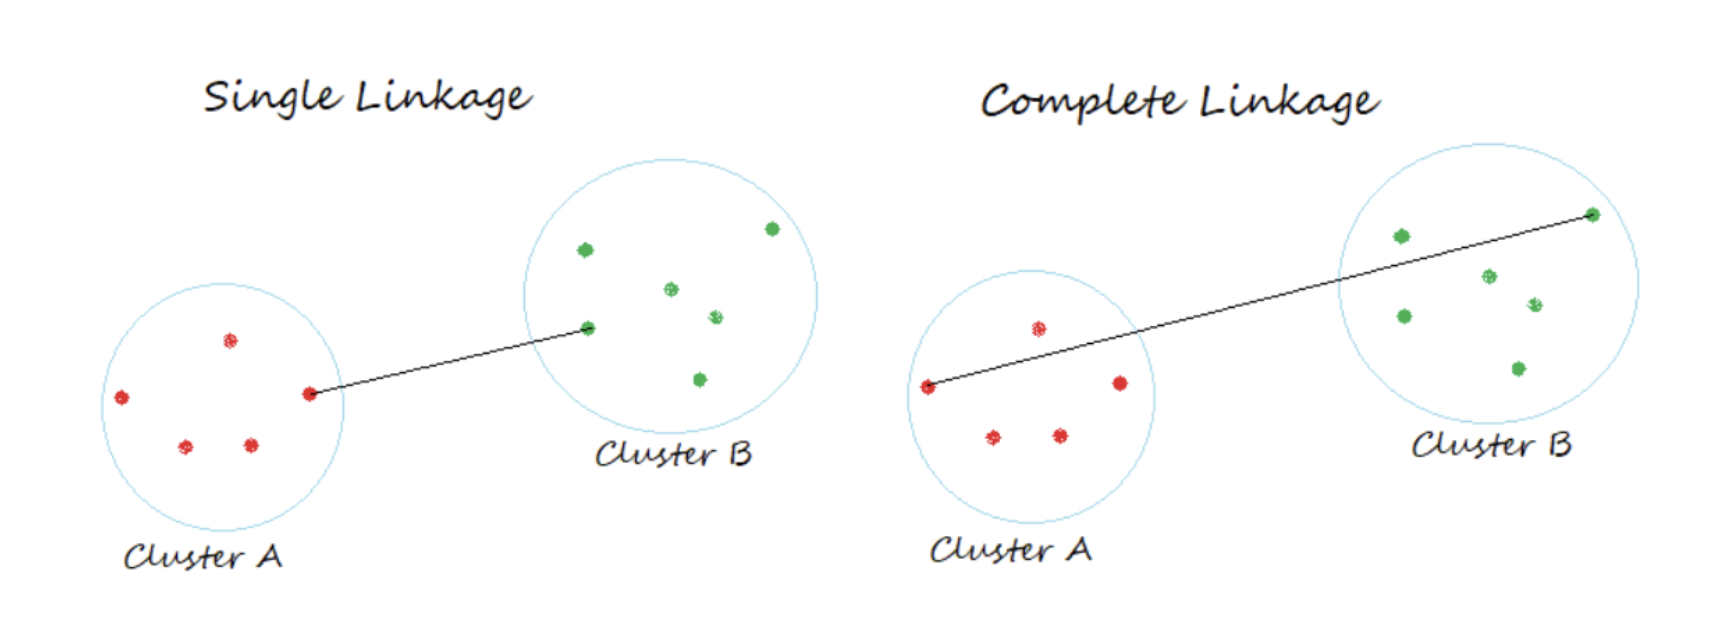

3. 평균 연결법(average linkage)
    - 주어진 군집의 샘플들끼리 거리를 측정하여, 그 평균을 군집 간 거리고 간주하고, 거리가 가장 가까운 두 군집을 묶어줍니다.
4. 중심 연결법(centroid linkage)
    - 평균 대신 무게 중심을 계산하고, 군집들 간의 무게 중심 간 거리를 군집 간 거리로 간주합니다.
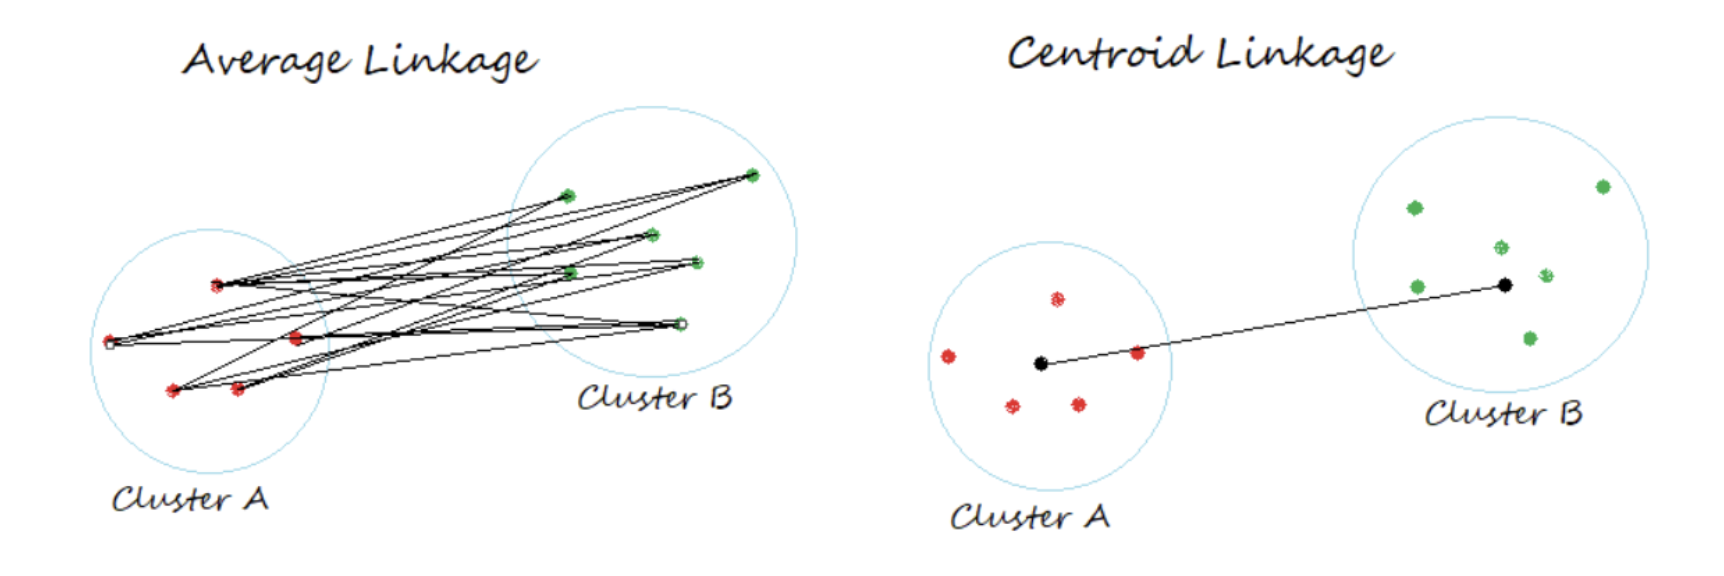

5. 와드 방법(Ward's linkage)
    - 각 군집이 합쳐졌을 때, 군집 중심(군집 내 관측치들의 평균)과 각 관측치 값의 차이 제곱을 거리로 이용합니다. 만약 두 군집이 이질적이라면 두 군집을 병합할 경우 군집 중심과 각 관측치들의 거리가 상당히 커지기 때문에 유용합니다.

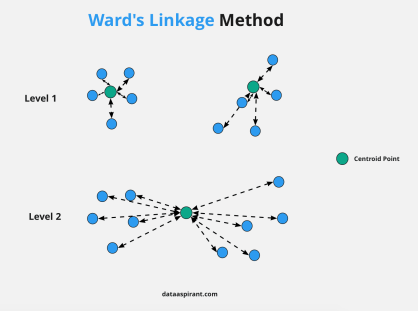

### 댄드로그램을 이용한 클러스터 개수 결정 

계층적 시각화의 장점은 먼저 댄드로그램으로 데이터의 계층적 구조를 시각화 한 다음, 적절한 클러스터 개수를 선택할 수 있다는 점입니다. 시각화를 위해 일부 샘플만 선택하여 모델을 학습한 다음, 댄드로그램을 그려보겠습니다.

계층적으로 군집이 형성된 것이 보이시나요? 적당한 기준 높이를 선택하면 클러스터 개수를 지정할 수 있습니다. 클러스터 개수를 4로 지정한 다음, 전체 데이터 셋에 대해서 클러스터링 알고리즘을 돌려보겠습니다.

### 실루엣 계수를 이용한 클러스터 개수 결정 

실루엣 계수(Silhouette Coefficient)란 클러스터링 모델의 성능을 측정할 수 있는 지표 중 하나입니다. 이는 특정 클러스터 내의 데이터 샘플이 다른 클러스터 대비, 자체 클러스터와 얼마나 유사한 지를 계산한 것입니다. -1에서 1 사이 값을 가지며, 값이 높을수록 자체 클러스터와 잘 일치하고, 인접 클러스터와 잘 일치하지 않음을 나타냅니다.

실루엣 계수에 대해 더 궁금하신 분들은 아래 문서를 참고해주세요.  
https://en.wikipedia.org/wiki/Silhouette_(clustering)

주어진 데이터 셋으로 클러스터의 개수를 변경해가며 실루엣 계수를 측정해보겠습니다.

### 계층적 군집 모델 학습

클러스터의 개수를 설정했으니, 이제 전체 데이터 셋에 대해서 hierarchical clustering 모델을 학습시켜 보겠습니다.

### 클러스터 별 데이터 시각화

각 클러스터 군집별로 집 값의 크기를 결정하는 각 변수들의 분포가 어떻게 달라지는지 시각화 해보겠습니다. 

각 클러스터 별로 확연히 다른 집 값 분포를 보여줍니다. 그렇다면 집 값에 영향을 주는 독립 변수들의 분포는 어떤지 시각화 해보겠습니다.

거주 공간 넓이도 가격과 거의 유사한 분포를 보여줍니다. 이번에는 클러스터 별로 yr_sold_built가 차이가 나는지 살펴보겠습니다. 

## 정리

지금까지 덴드로그램을 활용한 계층적 클러스터링에 대해서 알아보았습니다. 클러스터의 개수를 내가 직접 정할 수 있다는 장점이 있었고, 결과에 대한 명확한 해석도 가능한 장점이 있었습니다. 